# Task 1.5 – Twentieth-Century Text Mining


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob


In [2]:
# NLTK data downloads (run once)
nltk.download("punkt")
nltk.download("punkt_tab")  # required by newer NLTK versions
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger_eng")


[nltk_data] Downloading package punkt to /Users/a/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/a/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/a/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/a/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
# Load the scraped twentieth-century text file
with open("20th_century_key_events.txt", "r", encoding="utf-8") as file:
    text = file.read()

print("Characters in text:", len(text))
print("\nPreview (first 300 chars):\n")
print(text[:300])


Characters in text: 110314

Preview (first 300 chars):

Jump to content
Main menu
Search
Appearance
Donate
Create account
Log in
Wiki Loves Folklore
Photograph your local culture, help Wikipedia and win!
PARTICIPATE NOW
[Help with translations!]
Toggle the table of contents
Key events of the 20th century
2 languages
Article
Talk
Read
Edit
View history
To


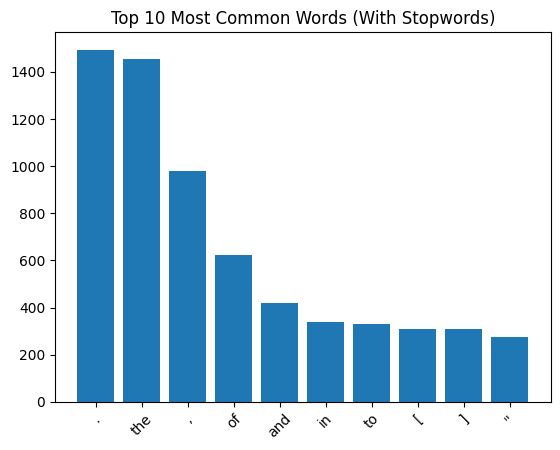

[('.', 1493),
 ('the', 1455),
 (',', 981),
 ('of', 621),
 ('and', 418),
 ('in', 339),
 ('to', 331),
 ('[', 310),
 (']', 310),
 ("''", 275)]

In [4]:
# Tokenize words and plot top 10 most common words (with stopwords)
text_lower = text.lower()
tokens = word_tokenize(text_lower)

word_counts = Counter(tokens)
top_10 = word_counts.most_common(10)

words = [w for w, c in top_10]
counts = [c for w, c in top_10]

plt.figure()
plt.bar(words, counts)
plt.title("Top 10 Most Common Words (With Stopwords)")
plt.xticks(rotation=45)
plt.show()

top_10


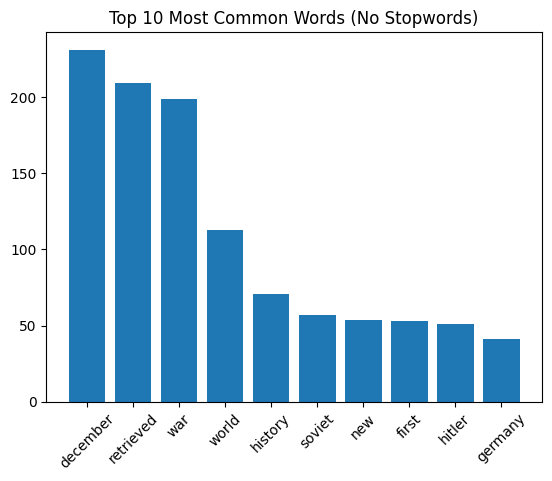

[('december', 231),
 ('retrieved', 209),
 ('war', 199),
 ('world', 113),
 ('history', 71),
 ('soviet', 57),
 ('new', 54),
 ('first', 53),
 ('hitler', 51),
 ('germany', 41)]

In [5]:
# Remove stopwords and punctuation, then rerun the plot
stop_words = set(stopwords.words("english"))

clean_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]

word_counts_clean = Counter(clean_tokens)
top_10_clean = word_counts_clean.most_common(10)

words_clean = [w for w, c in top_10_clean]
counts_clean = [c for w, c in top_10_clean]

plt.figure()
plt.bar(words_clean, counts_clean)
plt.title("Top 10 Most Common Words (No Stopwords)")
plt.xticks(rotation=45)
plt.show()

top_10_clean


After removing stop words and punctuation, the most common words change significantly. 
The first plot was dominated by common English words such as “the” and “and.” 
After cleaning the data, the most frequent words now reflect historical themes such as 
“war,” “world,” and “soviet.” 

This shows how removing stop words improves the interpretability of the text analysis.

In [6]:
# Create a tags list using TextBlob
blob = TextBlob(text)
tags = blob.tags

tags[:20]


[('Jump', 'NN'),
 ('to', 'TO'),
 ('content', 'VB'),
 ('Main', 'NNP'),
 ('menu', 'NN'),
 ('Search', 'NNP'),
 ('Appearance', 'NNP'),
 ('Donate', 'NNP'),
 ('Create', 'NNP'),
 ('account', 'NN'),
 ('Log', 'NNP'),
 ('in', 'IN'),
 ('Wiki', 'NNP'),
 ('Loves', 'NNP'),
 ('Folklore', 'NNP'),
 ('Photograph', 'NNP'),
 ('your', 'PRP$'),
 ('local', 'JJ'),
 ('culture', 'NN'),
 ('help', 'NN')]

In [7]:
# Create a list of the Top 10 POS tags
pos_labels = [tag for word, tag in tags]
pos_counts = Counter(pos_labels)
top_10_pos = pos_counts.most_common(10)

top_10_pos


[('NNP', 4229),
 ('NN', 2149),
 ('IN', 1924),
 ('DT', 1822),
 ('CD', 1677),
 ('JJ', 1321),
 ('NNS', 809),
 ('VBD', 804),
 ('RB', 623),
 ('VBN', 526)]

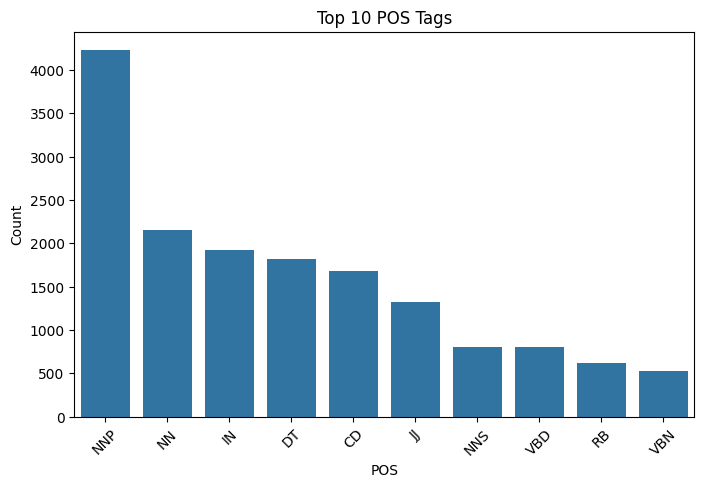

In [8]:
# Plot Top 10 POS tags using seaborn
df_pos = pd.DataFrame(top_10_pos, columns=["POS", "Count"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_pos, x="POS", y="Count")
plt.title("Top 10 POS Tags")
plt.xticks(rotation=45)
plt.show()


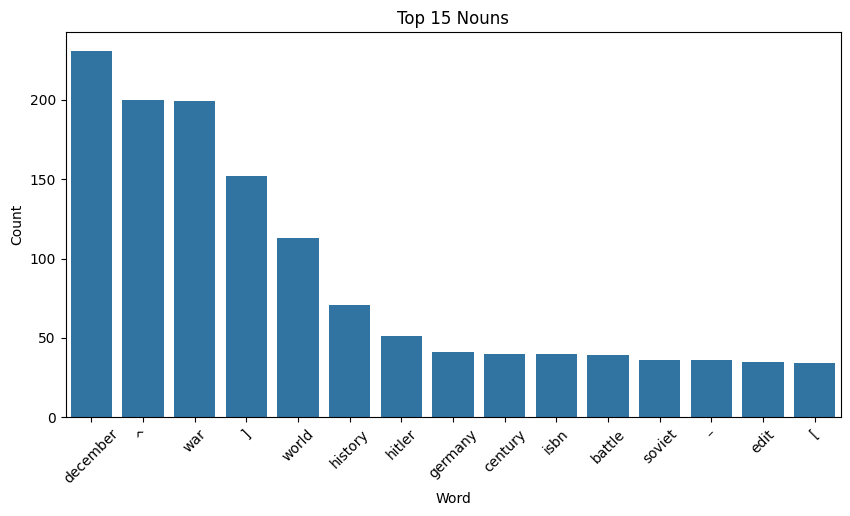

In [9]:
# Top 15 nouns (POS tags: NN, NNS, NNP, NNPS)
nouns = [word.lower() for word, tag in tags if tag in ["NN", "NNS", "NNP", "NNPS"]]
noun_counts = Counter(nouns)
top_15_nouns = noun_counts.most_common(15)

df_nouns = pd.DataFrame(top_15_nouns, columns=["Word", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=df_nouns, x="Word", y="Count")
plt.title("Top 15 Nouns")
plt.xticks(rotation=45)
plt.show()


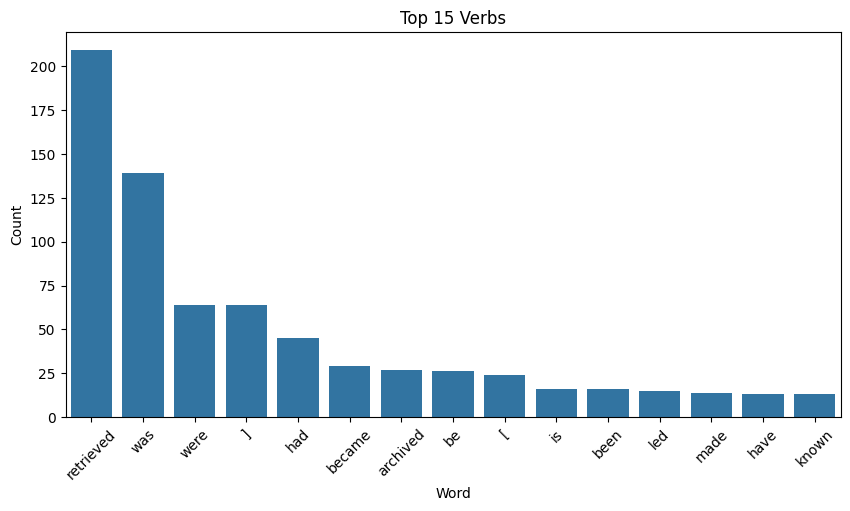

In [10]:
# Top 15 verbs (POS tags: VB, VBD, VBG, VBN, VBP, VBZ)
verbs = [word.lower() for word, tag in tags if tag in ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]]
verb_counts = Counter(verbs)
top_15_verbs = verb_counts.most_common(15)

df_verbs = pd.DataFrame(top_15_verbs, columns=["Word", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=df_verbs, x="Word", y="Count")
plt.title("Top 15 Verbs")
plt.xticks(rotation=45)
plt.show()


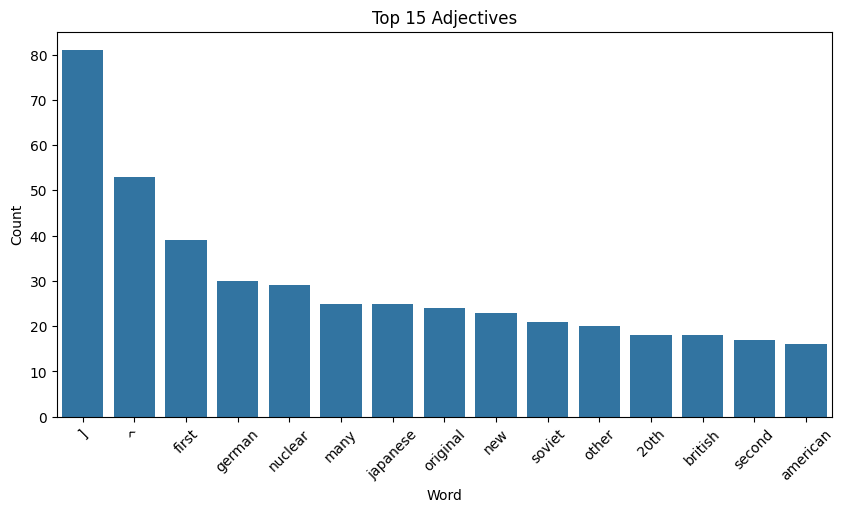

In [11]:
# Top 15 adjectives (POS tags: JJ, JJR, JJS)
adjectives = [word.lower() for word, tag in tags if tag in ["JJ", "JJR", "JJS"]]
adj_counts = Counter(adjectives)
top_15_adj = adj_counts.most_common(15)

df_adj = pd.DataFrame(top_15_adj, columns=["Word", "Count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=df_adj, x="Word", y="Count")
plt.title("Top 15 Adjectives")
plt.xticks(rotation=45)
plt.show()


Interpretation of POS Frequency Results

The noun plot shows that historical entities and concepts dominate the text, including references to specific countries, political figures, and major events. This reflects the factual and descriptive nature of the article.

The verb plot is largely composed of auxiliary and reporting verbs such as “was,” “were,” and “became,” which suggests that the text focuses on describing historical developments and transformations over time.

The adjective plot highlights descriptive qualifiers such as nationalities and ordinal indicators (e.g., “German,” “British,” “first”), reinforcing that the article emphasizes geopolitical identities and chronological structure.

Overall, the distribution confirms that the article is informational and historically descriptive, with strong emphasis on named entities and global political developments.


In [12]:
countries = [
"United States","Germany","France","United Kingdom","Russia","China","Japan",
"Italy","Spain","Canada","Australia","India","Brazil","Mexico","Soviet Union",
"Poland","Austria","Hungary","Turkey","Netherlands","Belgium","Sweden",
"Norway","Finland","Denmark","Greece","Portugal","Switzerland","Ireland"
]

In [13]:
# Count country mentions
country_counts = {}

for country in countries:
    country_counts[country] = text.lower().count(country.lower())

# Convert to DataFrame
df_countries = pd.DataFrame(
    country_counts.items(),
    columns=["Country", "Mentions"]
)

# Remove countries with 0 mentions
df_countries = df_countries[df_countries["Mentions"] > 0]

# Sort
df_countries = df_countries.sort_values(by="Mentions", ascending=False)

df_countries

,Country,Mentions
6,Japan,68
1,Germany,41
14,Soviet Union,32
0,United States,23
2,France,17
4,Russia,17
7,Italy,14
15,Poland,13
5,China,12
11,India,12


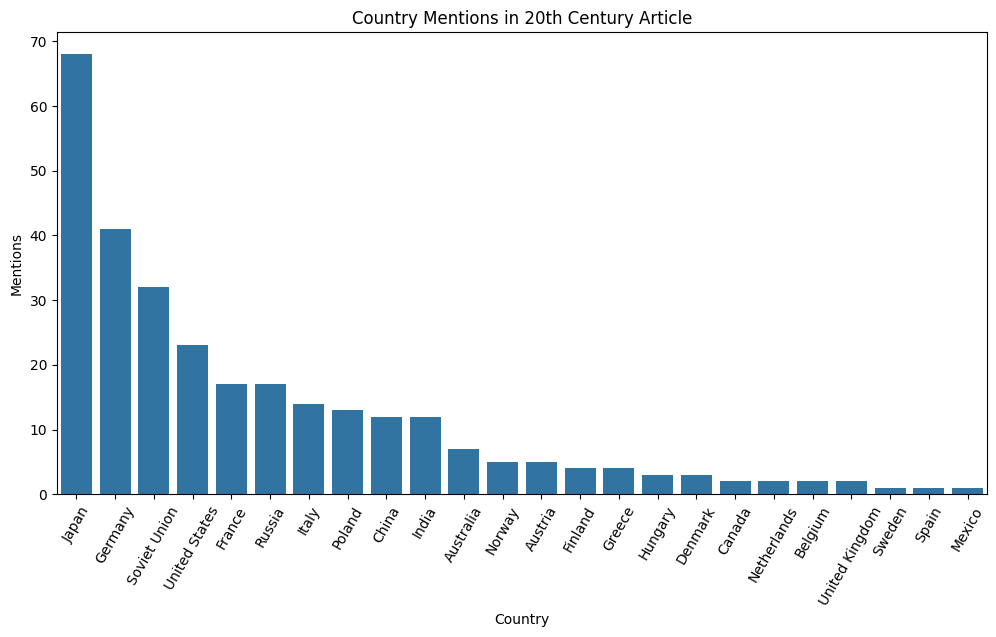

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_countries, x="Country", y="Mentions")

plt.title("Country Mentions in 20th Century Article")
plt.xticks(rotation=60)
plt.show()

Interpretation of Country Mentions

The plot shows that Japan, Germany, and the Soviet Union are among the most frequently mentioned countries in the article. This reflects the central role these nations played in major twentieth-century events, particularly the World Wars and the Cold War. The United States and France also appear prominently, highlighting their global political and military influence during this period. Countries with lower mention counts likely played more regional or secondary roles in the events described. Overall, the distribution suggests that the article emphasizes major geopolitical powers and conflict-driven historical developments of the twentieth century.